# 共享单车数据可视化分析报告(PPT)

通过使用python的seaborn库和Tableau对共享单车数据进行可视化  
得出结论以及给出租车公司关键性建议

## 一、项目背景

共享单车是近年来流行起来的新兴产业，发展具有重要价值  
通过对租车数据进行统计以及可视化分析，对单车运营维护团队提出改善性意见

## 二、查看数据

数据由10886行，12列数据构成，各名称意义如下：
- datetime 时间
- season 季节(1234分别为春夏秋冬)
- holiday 节假日(0否 1是)
- workingday 工作日(0否 1是)
- weather 天气(1晴天 2阴天 3小雨小雪 4恶劣天气)
- temp 实际温度
- atemp 体感温度
- humidity 湿度
- windspeed 风速
- casual 未注册用户
- registered 注册用户
- count 租借数量

### 导入库

In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

### 导入数据

In [2]:
df=pd.read_csv(r'F:\Data\bike-sharing-demand\train.csv')

### 查看数据

In [9]:
df.shape

(10886, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# 查看count数量是否等于casual+registed
df[(df.casual+df.registered)!=df['count']].count()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# 查看重复值
df.duplicated().sum()

0

In [8]:
# 查看缺失值
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

数据完美，不需要进行处理

## 三、数据可视化（PPT汇报报告）

### 租车人数

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5uFNcAK10NW.LsdHhWKtw6Mb.rL5KiutbbQHQPsyP81vgtGcI7dR*vGTDZeW0sVQQEyrEejmAjgj6TY3C9KXB8g!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

总体来看，租车人数还是较多的，共享单车时长势头较好

### 租车人数在各条件下的箱线图

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5kaehZfZ6lPqVBCCjm8iIgJJ1F7mP2hDW5wmd7jv*grRxG*5EpbLyYE8LSPvdoHNNzm89.Z9o8GVLeBT1xY8qMg!/b&bo=6AMgA.gDIAMDCSw!&rf=viewer_4)

根据以上箱线图，我们得出以下结论：
- 每小时的租车平均人数大约在150人左右
- 一天中有两个租车高峰，分别是早上8时左右和下午17时，18时左右，原因是上下班高峰期用车人数增加
- 一星期中，工作日和非工作日用车数量没有明显差异
- 一年中夏天和秋天用车数量较高，春天租车数量较少






### 租车人数在各条件下的核密度曲线图

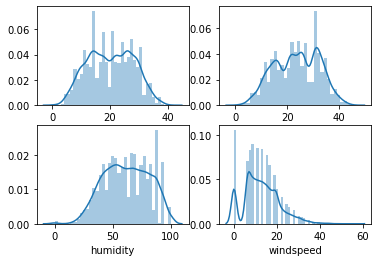

In [39]:
plt.pyplot.subplot(221)
sns.distplot(df.temp)
plt.pyplot.subplot(222)
sns.distplot(df.atemp)
plt.pyplot.subplot(223)
sns.distplot(df.humidity)
plt.pyplot.subplot(224)
sns.distplot(df.windspeed)

根据以上核密度图，得出结论：
- 实际温度在15-25度范围内租车人数较多
- 体感温度在15-30度范围内租车人数较多
- 湿度在50-80范围内租车人数较多
- 风速在8-20范围内租车人数较多

### 时间-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5gHeakyteHPa3TBdMcgefl*oyYEiXYZl9lkdHVTW4WIom5UxoWhcVrob*XQLfK1F5wioSQayegPv.v15h4KWoMQ!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

每天上下班时间（8,17时）是两个用车高峰期  
除此之外在12-13时是小高峰期，猜测可能是租车出门吃午餐的人

### 月份-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5kaehZfZ6lPqVBCCjm8iIgLFyaFr2FItDt8kfzGNNdXnobsHrIeISFk2VyVEaHNPMttGmjiZcRTWl09gjNnmVY4!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

1-5月租车人数增加，6月达到最高值并趋于稳定，10月租车人数开始下降

### 天气-租车人数关系

![](http://a1.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5lX9l35Q24u7r9JJe4VdHUsyeWEoSDImvqWiI8orwOUD2glj8QawnN74GR64t8clHZcKQwmh0jF7pkC2zPy9Qw0!/b&ek=1&kp=1&pt=0&bo=zAP7AcwD.wEDGTw!&tl=1&vuin=1016778812&tm=1603605600&sce=60-2-2&rf=viewer_4)

租车人数受天气好坏程度影响很大  
晴天租车人数最高，小雨/小雪天气租车人数反而是最低的

### 风速-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5nS3ADtQQAzoEEI6PLB7xHrBUzwbw3DPLJOy4DaW8DOMlCyzGAPk2oM6*GNckR8tey5SLxchyFLnBc*EU72Xe6E!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

当风速高于20时，租车数量开始降低  
当风速低于20时，租车数量一致较高

### 湿度-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5nS3ADtQQAzoEEI6PLB7xHolN8F9nNx69h3tgfREvVNzbsv3dxTo8LlTyWVxrqXBwd4rbLz98TQhL61eDzMLykA!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

当湿度在20时，租车人数达到最高值  
在20之后，租车人数开始逐渐降低

### 温度-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5gFxMCc1g825*th2KWKOkk2M6uI2BZeClPWP9JseqVv9YfVDjkPG6QDw4.0atGYGs4BoLBjSVmLDm3STSbuui7g!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

当温度在36度之前，租车人数随着温度升高而增高  
当温度大于36度之后，温度越高，租车人数越少

### 体感温度-租车人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5gFxMCc1g825*th2KWKOkk25W5*RlIEGmfsW7.sQHku7.FeVJoB3F35kFHRPkxxNgDCt04EwLvyzSG.QEWMezp4!/b&bo=zAP7AcwD.wEDCSw!&rf=viewer_4)

当体感温度在40度之前，租车人数随着体感温度升高而增高  
当体感温度大于40度之后，体感温度越高，租车人数越少

## 月份-天气关系

![](http://a1.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5tAQu1USIukTqr4O85fcwsHsVOBx7XGRIHpB0dADZNYmHghIiIOmHPbl7W61fTK0bXOE4atPSvPp0xXAPyb5ucg!/b&ek=1&kp=1&pt=0&bo=YwT7AWME.wEDGTw!&tl=1&vuin=1016778812&tm=1603609200&sce=60-2-2&rf=viewer_4)

我们已经得知在5-10月份以外的月份，租车情况远不如5-10月份租车情况好，为了找到问题关键，我先对天气进行统计

事实上，每个月份之间的晴天差异别没有非常明显，下面对具体月份具体天气的人数进行统计

### 月份-天气-人数关系

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/ruAMsa53pVQWN7FLK88i5uYp0Pz2..usIKjT1BIbCvvvC*DbIu848dmtv0d40TG0FNIWKDcT8N9YG29QUlGJbkoPYbZnG5gtHpDhuyfc8us!/b&bo=YwT7AWME.wEDCSw!&rf=viewer_4)

这张图是我觉得比较有意思的部分  

经过统计，我发现，之所以5-10月份是用户的使用高峰期，月份之间的差距在晴天，而不是别的天气

所以经过统计，我觉得如果想要提高在春天冬天租车用户的数量，最需要提高的是在春冬季节晴天时的用户人数

如果将宣传/优惠资源放在春冬季的晴天，而不是夏秋季的阴天/小雨小雪天气，得到的收益会更高

## 四、总结与建议

1. 时间hour：一天中有两个租车高峰，分别是早上8时左右和下午17时，18时左右，原因是上下班高峰期用车人数增加
2. 时间year：租车数量逐年上升
3. 月份month：一年中夏天和秋天用车数量较高，春天租车数量较少
4. 天气weather：晴天租车人数最高，小雨/小雪天气租车人数反而是最低的
5. 风速speed：当风速高于20时，租车数量开始降低；当风速低于20时，租车数量一致较高
6. 湿度humidity：当湿度在20时，租车人数达到最高值；在20之后，租车人数开始逐渐降低
7. 温度temp：当温度在36度之前，租车人数随着温度升高而增高；当温度大于36度之后，温度越高，租车人数越少
8. 体感温度atemp：当体感温度在40度之前，租车人数随着体感温度升高而增高；当体感温度大于40度之后，体感温度越高，租车人数越少

### 对于租车公司，最应该： 
- **春冬季节的晴天时刺激用户增长**  
- **每个月份之间最大的差异在于晴天时刻租车用户的人数**   
- **当晴天时刺激租车用户数量增长，带来的收益很高**  

对于租车公司应该重点运营：  
    1. 上下班高峰期，包括12.13时的小高峰期
    2. 重点季节是夏季和秋季，大约在5-10月份
    3. 在天气较好的时期

对于租车公司的淡季：
    1. 改进共享单车，提高在小雨/小雪天气的用户使用率
    2. 推行月卡等措施，提高用户在淡季月份的共享单车使用率
    3. 做好单车的保养工作